The purpose of this experiment is to determine whether scaling controllers affects the overall behavior of the swarm, besides affecting speed.

In [13]:
import random
import matplotlib.pyplot as plt
import pandas as pd

from novel_swarms.world.RectangularWorld import RectangularWorld
from novel_swarms.config.WorldConfig import RectangularWorldConfig
from novel_swarms.sensors.BinaryLOSSensor import BinaryLOSSensor
from novel_swarms.config.AgentConfig import DiffDriveAgentConfig
from novel_swarms.sensors.SensorSet import SensorSet
from novel_swarms.behavior import AverageSpeedBehavior, TotalCollisionsBehavior, SensorRotation, \
    RadialVarianceBehavior, AngularMomentumBehavior, GroupRotationBehavior, ScatterBehavior

Controller: [0.5141113367945898, -0.13618041569039718, 0.6889985176993025, 0.5362132165176408]
Scaled Controller: [0.7461719054364667, -0.19764979487202608, 1.0, 0.778250174337325]







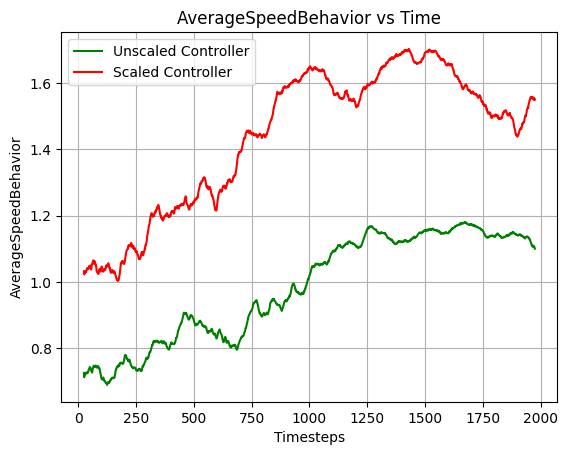

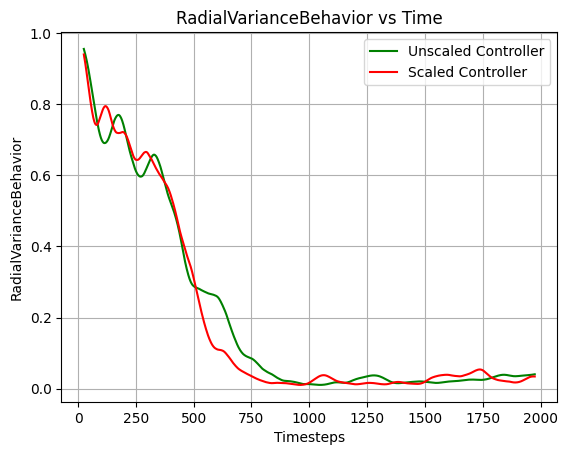

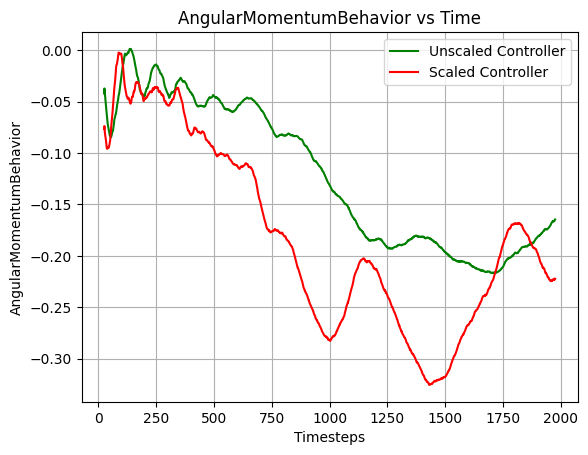

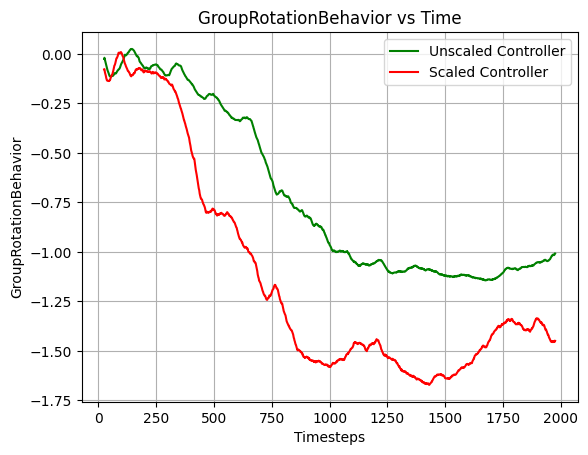

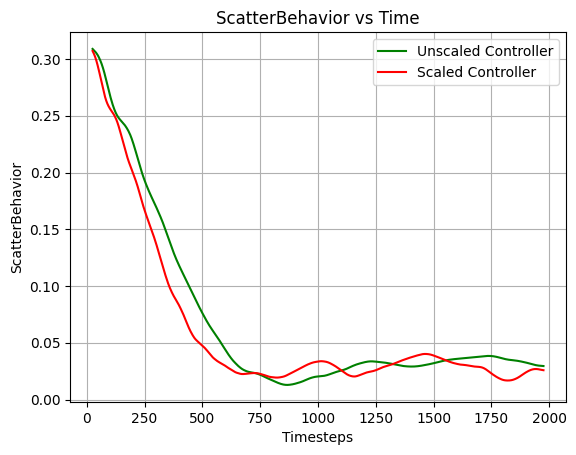

In [30]:
class Trial:

    def __init__(self):
        self.number_of_steps = 2000
        random.seed(None)
        self.controller = None
        # Make sure that we get an unscaled controller that isn't too similar to the scaled one by ensuring that no abs(x) exceeds 0.7
        while True:
            self.controller = [random.uniform(-1, 1) for _ in range(4)]
            invalid = False
            for x in self.controller:
                if abs(x) > 0.7:
                    invalid = True
            if invalid:
                continue
            break
        print(f"Controller: {self.controller}")
        self.scaled_controller = self.get_scaled_controller()
        print(f"Scaled Controller: {self.scaled_controller}")
        self.unscaled_world = self.get_world(self.controller)
        self.scaled_world = self.get_world(self.scaled_controller)
        self.scaling_factor = self.get_scaling_factor()

        for _ in range(self.number_of_steps):
            self.unscaled_world.step()
            self.scaled_world.step()

        for b in self.scaled_world.behavior:
            print()

    def get_scaling_factor(self):
        abs_controller = [abs(x) for x in self.controller]
        scaling_factor = 1 / max(abs_controller)
        return scaling_factor

    def get_scaled_controller(self):
        scaling_factor = self.get_scaling_factor()
        scaled_controller = [scaling_factor * x for x in self.controller]
        return scaled_controller

    def get_world(self, controller):
        sensors = SensorSet([BinaryLOSSensor(angle=0)])
        agent_config = DiffDriveAgentConfig(
            controller=controller,
            sensors=sensors,
            seed=0,
        )
        config = RectangularWorldConfig(
            size=(500, 500),
            n_agents=30,
            seed=0,
            behavior=[
                AverageSpeedBehavior(history=self.number_of_steps),
                RadialVarianceBehavior(history=self.number_of_steps),
                AngularMomentumBehavior(history=self.number_of_steps),
                GroupRotationBehavior(history=self.number_of_steps),
                ScatterBehavior(history=self.number_of_steps)
            ],
            agentConfig=agent_config,
            padding=15,
            show_walls=True,
            collide_walls=True
        )

        return RectangularWorld(config)

    def plot_comparison(self, index):
        window_size = 50
        unscaled_series = self.unscaled_world.config.behavior[index].value_history
        unscaled_series = pd.Series(unscaled_series).rolling(window_size, center=True).mean()
        scaled_series = self.scaled_world.config.behavior[index].value_history
        scaled_series = pd.Series(scaled_series).rolling(window_size, center=True).mean()
        timesteps = list(range(self.number_of_steps))

        # Plotting the series
        plt.plot(timesteps, unscaled_series, color='green', label='Unscaled Controller')
        plt.plot(timesteps, scaled_series, color='red', label='Scaled Controller')

        # Adding legend, axis labels, title, and units
        plt.legend()
        plt.xlabel('Timesteps')
        behavior_name = type(self.unscaled_world.config.behavior[index]).__name__
        plt.ylabel(behavior_name)
        plt.title(f"{behavior_name} vs Time")
        plt.grid(True)

        # Displaying the plot
        plt.show()

trial = Trial()
for i in range(5):
    trial.plot_comparison(i0.5141113367945898, -0.13618041569039718, 0.6889985176993025, 0.5362132165176408])